In [1]:
import matplotlib.pyplot as plt
import numpy as np
import circle_fit as cf
import os
import cv2
%run Functions.ipynb

## 拿園內的亮度做為權重計算中心

In [10]:
def Get_Centroid_with_Lightiness(points, image):
    cx = 0
    cy = 0
    lightiness =0
    for y, x in points:
        lightiness += image[y,x]/len(points)
        cx += image[y,x] * x
        cy += image[y,x] * y
        
    cx = (cx/len(points))/lightiness
    cy = (cy/len(points))/lightiness
    
    return cx, cy

os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4")

files = os.listdir()
files.sort()
files = np.asarray(files)
batches = np.split(files, 297)

predictions = []
for batch in batches:
    images = [cv2.imread(img,0) for img in batch]
    height, width = images[0].shape
    
    mean = np.mean(images, axis=0).astype('uint8')
    blur, nlm, otsu, edge = image_processing(mean)
    
    # get all target points
    cir_pts = []
    for i in range(height):
        for j in range(width):
            if otsu[i,j] == 255:
                cir_pts.append([i,j])
    
    cx, cy = Get_Centroid_with_Lightiness(cir_pts, nlm)
    
    predictions.append([cx, cy])
    print("{}, {}".format(cx, cy))

86.48997742177902, 72.7819671160347
86.5367720222525, 72.85855422894379
86.4823846632917, 72.8992728741781
86.47038124998483, 72.79872831713287
86.53866381675269, 72.87392821167873
86.55867526280991, 72.85492279894692
86.53799122125452, 72.90224947265543
86.4340992982294, 72.929404009358
86.51991213256531, 73.04382704196546
86.53370851991438, 72.9632555711678
86.5327103111133, 73.0177393600859
86.41279780460754, 72.93441957660059
86.45084986220331, 72.99013487488953
86.47179791441214, 72.99582784238201
86.52173489816465, 72.91970111059776
86.35666745969277, 72.937795785724
86.50320835134998, 72.93228076677605
86.50297044242281, 72.85896317905032
86.49678965264667, 73.01828079103822
86.59307803523714, 72.88766516379663
86.54878033706325, 72.99052980203619
86.53272507668056, 72.83447625521637
86.5199756120792, 72.95537962115142
86.5788968935807, 72.90449972805975
86.47732900374396, 72.90834317703055
86.48093255702798, 72.87497045889049
86.46370047390779, 72.83788190095977
86.480506786215

86.39213532074896, 72.84828023508501
86.45039007901373, 72.86871671250631
86.41279570080472, 72.8543907735843
86.44341137456615, 72.81603294519913
86.5271492835491, 72.83105519226486
86.47119093419192, 72.83640809438138
86.4430626237721, 72.8245045382568
86.4757509781569, 72.79194981963899
86.54136441961357, 72.82720578111278
86.52400832462413, 72.85464349380908
86.57850543315249, 72.99280098615031
86.52999773545143, 72.91073028263271
86.43443249935517, 72.88024717486432
86.53336697991534, 72.86750827398654
86.50693659858432, 72.85571725087307
86.45772442240884, 72.8431521089859
86.58395826026249, 72.86814111185673
86.50605666606269, 72.82270177339393
86.55238346212832, 72.87346410505556
86.46839802071905, 72.79663192448949
86.46800936877827, 72.84310556753792
86.5821976578124, 72.80965564396362
86.44311439227114, 72.80892743257105
86.4221909762485, 72.91217001896803
86.47218577132638, 72.92767124292615
86.55279686532288, 72.8522662146343
86.41189348260262, 72.80840258041525
86.5132888

In [11]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (86.50090, 72.92572)
Variance     : (0.00218, 0.00529)
Max Length   : 0.24710, 0.35217 (pixels)


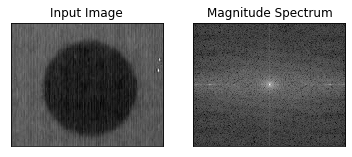

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4")
file_name = "Case_0.bmp"

img = cv2.imread(file_name,0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

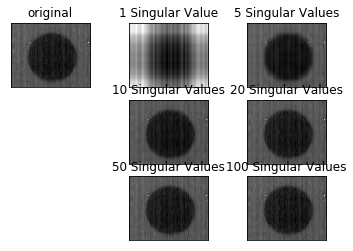

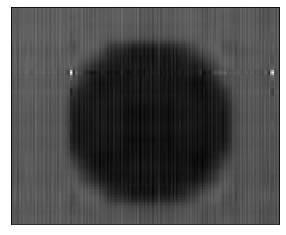

In [11]:
def svd_decompose(img, s_num):  
    u, s, vt = np.linalg.svd(img)
    h, w = img.shape[:2]
    s1 = np.diag(s[:s_num],0) #用s_num个奇异值生成新对角矩阵  
    u1 = np.zeros((h,s_num), float)
    vt1 = np.zeros((s_num,w), float)
    u1[:,:] = u[:,:s_num]
    vt1[:,:] = vt[:s_num,:]
    svd_img = u1.dot(s1).dot(vt1)
    return svd_img

os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4")
file_name = "Case_999.bmp"

img = cv2.imread(file_name, 0)
svd_1 = svd_decompose(img, 1)
svd_5 = svd_decompose(img, 5)
svd_10 = svd_decompose(img, 10)
svd_20 = svd_decompose(img, 20)
svd_50 = svd_decompose(img, 50)
svd_100 = svd_decompose(img, 100)

# svd_5 = np.array(np.round(svd_5), dtype=np.uint8)
# svd_100 = np.array(np.round(svd_100), dtype=np.uint8)
# # print(img)
# # print(str(svd_5)[:])

plt.figure(1);
plt.subplot(331);plt.imshow(img, cmap='gray');plt.title('original');plt.xticks([]);plt.yticks([]);
plt.subplot(332);plt.imshow(svd_1, cmap='gray');plt.title('1 Singular Value');plt.xticks([]);plt.yticks([]);
plt.subplot(333);plt.imshow(svd_5, cmap='gray');plt.title('5 Singular Values');plt.xticks([]);plt.yticks([]);
plt.subplot(335);plt.imshow(svd_10, cmap='gray');plt.title('10 Singular Values');plt.xticks([]);plt.yticks([]);
plt.subplot(336);plt.imshow(svd_20, cmap='gray');plt.title('20 Singular Values');plt.xticks([]);plt.yticks([]);
plt.subplot(338);plt.imshow(svd_50, cmap='gray');plt.title('50 Singular Values');plt.xticks([]);plt.yticks([]);
plt.subplot(339);plt.imshow(svd_100, cmap='gray');plt.title('100 Singular Values');plt.xticks([]);plt.yticks([]);
plt.show()

plt.imshow(svd_5, cmap='gray');plt.xticks([]);plt.yticks([])
# plt.savefig("/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.02.07/test.png")
plt.imsave("/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.02.07/test.png", svd_50)
plt.show()

In [12]:
img1 = cv2.imread("/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.02.07/test.png",0)
img2 = cv2.imread("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4/Case_0.bmp",0)


blur1, nlm1, otsu1, edge1 = image_processing(img1)
blur2, nlm2, otsu2, edge2 = image_processing(img2)

cv2.imwrite("/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.02.21/svd_50.png", edge1)

cv2.imshow("Img1", img1)
cv2.imshow("Img2", img2)
cv2.imshow("Edge1", edge1)
cv2.imshow("Edge2", edge2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4")

files = os.listdir()
files.sort()
files = np.asarray(files)
batches = np.split(files, 297)

predictions = []
for batch in batches:
    images = [cv2.imread(img,0) for img in batch]
    edges = [image_processing(image)[3] for image in images]
    
    
    Consense = np.zeros(edges[0].shape)
    for edge in edges:
        Consense = Consense + edge/255
    
    for i, Row in enumerate(Consense):
        for j, Val in enumerate(Row):
            if (Val >=5):
                Consense[i,j] = 255
            else:
                Consense[i,j] = 0
    
    cv2.imwrite("/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.02.07/Consense_2.png", Consense)
    cv2.imshow("Edge", Consense)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    break

In [ ]:
show_resoult(predictions)

## 尋找可能 Pattern

Mean 69.50737463126843
Var 5.134901367026044
Min 64
Max 75


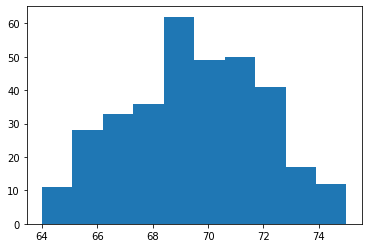

Cx = 86.08590148818661
Cy = 72.4234235374346
Cr = 50.93665773955092


In [13]:
# folder_path = "/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4"
# file_name = "Case_99.bmp"
folder_path = "/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.02.07"
file_name = "test.png"
Map_path = "/home/mj/HardDisk/Github/NTU/ARCS/Demo/2020.01.14"
Map_name = "Case4_Map.bmp"

img = cv2.imread("{}/{}".format(folder_path, file_name), 0)
Map = cv2.imread("{}/{}".format(Map_path, Map_name))
h,w = img.shape[:2]

_, nlm, otsu, edge = image_processing(img)
edge_points = get_edge_points(edge)


## 分析點在 NLM 上值的分佈
vals = []
for x, y in edge_points:
    vals.append(nlm[y,x])

print("Mean", np.mean(vals))
print("Var", np.var(vals))
print("Min", min(vals))
print("Max", max(vals))

plt.hist(vals)
plt.show()

##  獲得比較表
for x, y in edge_points:
    if (np.array_equal(Map[y,x,:], [0,0,255])):
        Map[y,x,:] = [88,113,254]
    elif (np.array_equal(Map[y,x,:], [0,118,238])):
        Map[y,x,:] = [88,113,114]
    else:
        Map[y,x,:] = [255,255,255]
        
cx,cy,cr,_ = cf.least_squares_circle((edge_points))
print("Cx = {}\nCy = {}\nCr = {}".format(cx,cy,cr))
cv2.imshow("Comapred", Map)
cv2.imshow("Otsu", otsu)
cv2.imshow("NLM", nlm)

while(True):
    if (cv2.waitKey(10) & 0xff == ord('q')):
        break
cv2.destroyAllWindows()

問題： 
    1. 對角點的距離值沒有處理道
    2. 加入 多張影像看看
    


## 實做 L 型 Pattern

In [ ]:
def Get_length_level(length, standard, Min, Max):
    if (length > Max):
        return 4
    elif (length > standard):
        return 3
    elif (length > Min):
        return 2
    else:
        return 1
    
    
def Get_Map(edge, nlm, Cir):
    Cx, Cy, Cr = Cir[:]
    h,w = edge.shape[:2]
    min_len = Cr - 0.5
    max_len = Cr + 0.5
    
    Map = np.zeros((h,w,3))
    Map[:,:,0] = edge
    Map[:,:,1] = nlm
    
    for i in range(h):
        for j in range(w):
            if (Map[i,j,0] == 255):
                length = np.sqrt((Cx - j)**2 + (Cy - i)**2)
                Map[i,j,2] = Get_length_level(length, Cr, min_len, max_len)
                
    return Map

In [ ]:
def Pattern_L():
    P = np.asarray([[1,1,0],
                    [0,0,1],
                    [0,0,1]])
    
    return [np.rot90(P, i) for i in range(4)]

In [ ]:
def Edit_Edge(edited_edge, Map, y, x, T):
    c = Map[y,x  ,2]
    u = Map[y-1,x  ,2]
    b = Map[y+1,x  ,2]
    l = Map[y  ,x-1,2]
    r = Map[y  ,x+1,2]
    
    if (T == 0):
        if(c == 1 and u == 2 and r == 2):
#             print("Type 0 太內")
            edited_edge[y,x] = 0;
            edited_edge[y-1,x+1] = 255;

        if(c == 4 and u == 3 and r == 3):
#             print("Type 0 太外")
            edited_edge[y,x] = 0;
            edited_edge[y-1,x+1] = 255
   
    elif (T == 1):
        if(c == 0 and u == 1 and l == 1):
#             print("Type 1 太內")
            edited_edge[y,x] = 0;
            edited_edge[y-1,x-1] = 255;

        if(c == 3 and u == 2 and l == 2):
#             print("Type 1 太外")
            edited_edge[y,x] = 0;
            edited_edge[y-1,x-1] = 255;
        
    elif (T == 2):
        if(c == 0 and b == 1 and l == 1):
#             print("Type 2 太內")
            edited_edge[y,x] = 0;
            edited_edge[y+1,x-1] = 255;

        if(c == 3 and b == 2 and l == 2):
#             print("Type 2 太外")
            edited_edge[y,x] = 0;
            edited_edge[y+1,x-1] = 255;
                
    elif (T == 3):
        if(c == 0 and b == 1 and r == 1):
#             print("Type 3 太內")
            edited_edge[y,x] = 0;
            edited_edge[y+1,x+1] = 255;

        if(c == 3 and b == 2 and r == 2):
#             print("Type 3 太外")
            edited_edge[y,x] = 0;
            edited_edge[y+1,x+1] = 255;
    
    return edited_edge

In [ ]:
def Get_Edited_Edges(Map):
    patterns = Pattern_L()
    edited_edge = Map[:,:,0].copy()
    
    for i, Row in enumerate(Map):
        for j, Val in enumerate(Row):
            if(Val[0] == 0):
                continue
                
            tmp = edge[i-1:i+2, j-1:j+2]
            for tp, pattern in enumerate(patterns):
                match = np.sum(pattern * tmp)
                if (match == 1020):
                    edited_edge = Edit_Edge(edited_edge, Map, i, j, tp)
    
    
    return edited_edge

In [ ]:
## Read image
os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_2")
file_name = "Case_90.bmp"
img = cv2.imread(file_name, 0)

## Get processed images
_, nlm, _, edge = image_processing(img)
edge_pts = get_edge_points(edge)

# print(edge_pts)

## Get center
cx, cy, r, _ = cf.least_squares_circle((edge_pts))
print("X:{}\nY:{}\nR:{}".format(cx, cy, r))

## Create Map
Cir = [cx, cy, r]
Map = Get_Map(edge, nlm, Cir)

## Edit edges
edited_edge = Get_Edited_Edges(Map)
edited_edge_pts = get_edge_points(edited_edge)

# Get after edited center
cx, cy, r, _ = cf.least_squares_circle((edited_edge_pts))

print("---------------------------------------------------------")
print("X:{}\nY:{}\nR:{}".format(cx, cy, r))

## 移動測試

In [ ]:
os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_2")

files = os.listdir()
files.sort()
files = np.asarray(files)

predictions = []
for file in files:
    images = cv2.imread(file,0)
    ## Get processed images
    _, nlm, _, edge = image_processing(images)
    edge_pts = get_edge_points(edge)

    ## Get center
    cx, cy, r, _ = cf.least_squares_circle((edge_pts))

    ## Create Map
    Cir = [cx, cy, r]
    Map = Get_Map(edge, nlm, Cir)

    ## Edit edges
    edited_edge = Get_Edited_Edges(Map)
    edited_edge_pts = get_edge_points(edited_edge)

    # Get after edited center
    cx, cy, r, _ = cf.least_squares_circle((edited_edge_pts))
    
    predictions.append([cx, cy])
    print("{}: {}, {}".format(file,cx, cy))

In [ ]:
show_resoult(predictions)

## 重複過半的 Pixel 才拿來用

In [4]:
def Get_ROI_Loc(cy,cx,cr):
    ## Loc 從左上到右下，y放前面（符合 image 讀取）
    x, y, r = int(round(cx)), int(round(cy)), int(round(cr))
    roi_loc = [[x-r-10, y-r-10], [x+r+10, y+r+10] ]
    return np.asarray(roi_loc)

In [5]:
def Get_ROI(image):
    ## 拿一張影像先算 Center 拿來取 ROI
    _, _, _, edge = image_processing(image)
    edge_pts = get_edge_points(edge)
    cx,cy,cr,_ = cf.least_squares_circle((edge_pts))
    
    roi_loc = Get_ROI_Loc(cy,cx,cr)
    return roi_loc

In [2]:
def Analize_Multi_Frames(roi_loc, images):
    ## 取得所有當批影像的 ROI 
    lx, ly = roi_loc[0,:]
    rx, ry = roi_loc[1,:]
    imgs_crop = [image[ly:ry, lx:rx] for image in images]
    
    
    ## 取得每張邊緣影像的
    imgs_edge = []
    imgs_nlm = []
    for cropped in imgs_crop:
        _, nlm, _, edge = image_processing(cropped)
        imgs_edge.append(edge)
        imgs_nlm.append(nlm)
    
    
#     ## 求每一張的圓心
#     Cirs = [cf.least_squares_circle((img_edge))[:3] for img_edge in imgs_edge]
#     Maps = [Get_Map(imgs_edge[i], imgs_nlm[i], Cirs[i]) for i in range(len(images))]
    
#     ## 修改圓
#     edited_edges = [Get_Edited_Edges(Map) for Map in Maps]
    
    
    ## 取得每張邊緣的點
    imgs_edge_pts = [get_edge_points(edge) for edge in imgs_edge]
    
    
#     ## 產生 CALC 來紀錄出現次數
#     CALC = np.zeros(images[0].shape)
#     for img_edge_pts in imgs_edge_pts:
#         for x, y in img_edge_pts:
#             CALC[y,x] = CALC[y,x] + 1
   
#     ## 塞選出重複出現一半次數的點
#     valid_pts = []
#     for i, row in enumerate(CALC):
#         for j, val in enumerate(row):
#             if(val >= 5):
#                 valid_pts.append([j,i])
    
    valid_pts = []
    for img_edge_pts in imgs_edge_pts:
        for x, y in img_edge_pts:
            valid_pts.append([x,y])
    
#     ## RANSAC
#     fit_sample_numbers = int(0.05*len(valid_pts))
    
#     ### Baysien
#     fit_func = lambda X: circle_fit_model([1,1,1], X, np.ones(len(X)))
#     error_func = lambda X, params: circle_ls_errors(X[:,1], X[:,0], params[0], params[1], params[2], np.ones(len(X)))
#     probs,params,errors = ransac_bayesian(error_func, fit_func,np.asarray(valid_pts),
#                                      iterations = 10,fit_samples = fit_sample_numbers ,fit_with_best_n = int(1*len(valid_pts)))
#     ### Baysien
    
#     ### Classic
#     fit_func = lambda X: circle_fit_model([1,1,1], X, np.ones(len(X)))
#     error_func = lambda X, params, threshold: evaluate_func(X[:,1], X[:,0], params[0], params[1], params[2], np.ones(len(X)), threshold)
#     params = ransac_classic(error_func, fit_func, np.asarray(valid_pts), iterations=1000, fit_samples=fit_sample_numbers, inlier_threshold=0.3, min_inliers=20)
#     ### Classic
    
#     predicted = ([lx+params[0], ly+params[1]])
#     return predicted
#     ## RANSAC
    

    cx, cy, r, _ = cf.least_squares_circle((valid_pts))
    predicted = [cx+lx, cy+ly] 
    return predicted

NameError: name 'np' is not defined

## 混和測試

In [6]:
os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4")

files = os.listdir()
files.sort()
files = np.asarray(files)
batches = np.split(files, 297)

predictions = []
for batch in batches:
    images = [cv2.imread(img,0) for img in batch]
    roi_loc = Get_ROI(images[0])
    predicted = Analize_Multi_Frames(roi_loc, images)
    predictions.append(predicted)
    print("{}, {}".format(predicted[0], predicted[1]))

86.35060179711948, 72.6835754143471
86.44627051618038, 72.72513796604349
86.4107598266971, 72.75907994687114
86.34924914853556, 72.63399508714329
86.43903812449588, 72.7426314198342
86.45616686692054, 72.70322908674663
86.37160425485158, 72.76704554091557
86.29546786472756, 72.81248368712689
86.39745420829502, 72.9539523612699
86.39321557886053, 72.82164515088768
86.37163638302702, 72.85732541746462
86.3137715227754, 72.76500323582616
86.36554336962115, 72.84856999521412
86.29777646081229, 72.89417441113947
86.38028431305383, 72.74956903237458
86.2548554299769, 72.77697731995192
86.39883300526688, 72.74754359885124
86.4148172073451, 72.77027536617229
86.35673145640487, 72.88420419306917
86.44500414799192, 72.73376965424276
86.40762867155152, 72.81241874163912
86.38648388052735, 72.69696227809507
86.39285604498842, 72.76985118479797
86.43522933768708, 72.81491430551958
86.3422751015687, 72.7728911177258
86.36125718895703, 72.7342872891524
86.37341229614168, 72.72898393021973
86.36053146

86.30316204718643, 72.69531665627869
86.33920947562268, 72.77298461696458
86.27329886322443, 72.70431499172469
86.3170658460122, 72.73999627610894
86.3846096386786, 72.65229541168289
86.36527131017974, 72.73499238503216
86.32630406492675, 72.72822676744956
86.37185853174421, 72.6284806240237
86.35955564003606, 72.71560227331443
86.37921703017821, 72.74280799085858
86.41072912783011, 72.87776756175458
86.39106063478002, 72.79462347509016
86.32119827310177, 72.76519108932894
86.40377851819429, 72.71093047623987
86.34941950118701, 72.74482568591236
86.36199848623755, 72.78086183687678
86.4330850570413, 72.75146109676896
86.41191806587084, 72.71965667898738
86.40366006806168, 72.70622778699817
86.39087329152272, 72.69114491307747
86.33746982271136, 72.77915925395217
86.48914763602627, 72.71166983730414
86.3598212440526, 72.69048185673682
86.32752112597328, 72.79154456858322
86.3330366118743, 72.77556844543652
86.38708188043546, 72.7399421801464
86.31714151311854, 72.65225067104396
86.40544

In [7]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (86.38076, 72.80647)
Variance     : (0.00180, 0.00498)
Max Length   : 0.25030, 0.36755 (pixels)


## 純多張測試前檢查

In [ ]:
os.chdir("/home/mj/Github/NTU/ARCS/img/X-Ray/New/Case_1")
files = os.listdir()
files.sort()
files = np.asarray(files)
batches = np.split(files, 297)

img = cv2.imread(files[0], 0)
roi_loc = Get_ROI(img)

lx, ly = roi_loc[0,:]
rx, ry = roi_loc[1,:]
imgs_crop = img[ly:ry, lx:rx]

blur, nlm, otsu, edge = image_processing(imgs_crop)

cv2.imshow("Blur", blur)
cv2.imshow("Nlm", nlm)
cv2.imshow("Otsu", otsu)
cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
folder_path = "/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_3"

files = os.listdir(folder_path)
files.sort()
for file in files:
    img = cv2.imread("{}/{}".format(folder_path, file), 0)
    _, nlm, _, edge = image_processing(img)
    edge_points = get_edge_points(edge)


    ## 分析點在 NLM 上值的分佈
    vals = []
    for x, y in edge_points:
        vals.append(nlm[y,x])

    print("Mean", np.mean(vals))
    print("Min", min(vals))
    print("Max", max(vals))
    plt.hist(vals)
    plt.show()


## 實際測試

In [22]:
os.chdir("/home/mj/HardDisk/Github/NTU/ARCS/img/X-Ray/New/Case_4")

files = os.listdir()
files.sort()
files = np.asarray(files)
batches = np.split(files, 297)

predictions = []
for batch in batches:
    images = [cv2.imread(img,0) for img in batch]
    roi_loc = Get_ROI(images[0])
    predicted = Analize_Multi_Frames(roi_loc, images)
    predictions.append(predicted)
    print("{}, {}".format(predicted[0], predicted[1]))

85.68401598799724, 73.43282792365792
86.69854689092874, 72.35312985917099
85.76461056308835, 73.44432150981628
85.60219123278736, 73.34650453447065
85.84364203632246, 73.52475875039394
85.78507343185044, 73.52387217184831
85.75289379971984, 73.41441895471382
85.89793631434141, 73.19630643890244
85.99902926682581, 73.40014885331553
85.77856597597182, 73.50075260022095
86.82362707499506, 72.40857293685269
85.77368820630699, 73.39150838298627
85.8977539189008, 73.44280288410977
85.91606142632773, 73.32135171911852
85.77972759709914, 73.34749529398934
85.87895660125706, 73.13281576389427
85.74708189717094, 73.44218724307488
85.82892343512157, 73.52518475483782
85.93011017113804, 73.36791573058545
85.66588986394333, 73.50080179621881


KeyboardInterrupt: 

In [ ]:
show_resoult(predictions)

## 算機率

In [ ]:
from scipy.special import comb

def Count_Probability(num_tal, num_sel, prob):
    x = prob
    y = 1 - x
    
    result = 0
    for i in range(num_sel, num_tal+1):
        num_x = i 
        num_y = num_tal - i
        result = result + comb(num_tal, i) * x**num_x * y**num_y
    
    return result

Count_Probability(20,10,0.65)